# Running and training a linear model

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [2]:
# Bring in the data
oecd_data = pd.read_csv("/Users/J.Alvarez/Machine Learning/oecd_data.csv", thousands=',')
gdp_per_capita = pd.read_csv("/Users/J.Alvarez/Machine Learning/gdp.csv",thousands=',',delimiter='\t', encoding='latin1', na_values="n/a")

In [3]:
def prepare_country_stats(oecd_data, gdp_per_capita):
    oecd_data = oecd_data[oecd_data["INEQUALITY"]=="TOT"]
    oecd_data = oecd_data.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_data, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [4]:
#explore the data
country_stats = prepare_country_stats(oecd_data, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

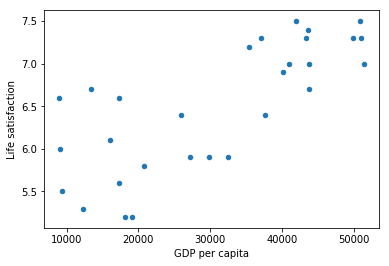

In [5]:
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

In [6]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]
print(model.predict(X_new)) 

[[ 6.18443854]]
